In [19]:
# 직접 그림판에 그린 그림을 CNN 모델을 만들어 분류하기

In [20]:

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

In [21]:
inputs = torch.Tensor(1, 3, 28, 28)
print(inputs.shape)

torch.Size([1, 3, 28, 28])


In [22]:
conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding='same')
out =conv1(inputs)
print(out.shape)

torch.Size([1, 32, 28, 28])


In [23]:
# 첫번째 MaxPool2D
pool = nn.MaxPool2d(kernel_size=2)
out = pool(out)
print(out.shape)

torch.Size([1, 32, 14, 14])


In [24]:
# 두번째 Conv2D
conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding='same')
out = conv2(out)
print(out.shape)

torch.Size([1, 64, 14, 14])


In [25]:
# 두번째 MaxPool2D
pool = nn.MaxPool2d(kernel_size=2)
out = pool(out)
print(out.shape)

torch.Size([1, 64, 7, 7])


In [26]:
flatten = nn.Flatten()
out = flatten(out)
print(out.shape) # 64 * 7 * 7

torch.Size([1, 3136])


In [27]:
fc = nn.Linear(3136, 10)
out = fc(out)
print(out.shape)

torch.Size([1, 10])


In [28]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cpu


In [29]:
data_dir = '/content/drive/MyDrive/KDT 시즌3/6. 머신러닝과 딥러닝/Data/Homework_imgs'


In [30]:
from torchvision.datasets import ImageFolder # 이미지폴더 가져오기
import torchvision.transforms as transforms

train_data = ImageFolder(
    root=data_dir,
    transform=transforms.Compose([
        transforms.Resize((28,28)),
        transforms.ToTensor()
    ])
)

In [31]:
test_data = ImageFolder(
    root=data_dir,
    transform=transforms.Compose([
        transforms.Resize((28,28)),
        transforms.ToTensor()
    ])
)

In [32]:
print(train_data)
print(test_data)

Dataset ImageFolder
    Number of datapoints: 180
    Root location: /content/drive/MyDrive/KDT 시즌3/6. 머신러닝과 딥러닝/Data/Homework_imgs
    StandardTransform
Transform: Compose(
               Resize(size=(28, 28), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )
Dataset ImageFolder
    Number of datapoints: 180
    Root location: /content/drive/MyDrive/KDT 시즌3/6. 머신러닝과 딥러닝/Data/Homework_imgs
    StandardTransform
Transform: Compose(
               Resize(size=(28, 28), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )


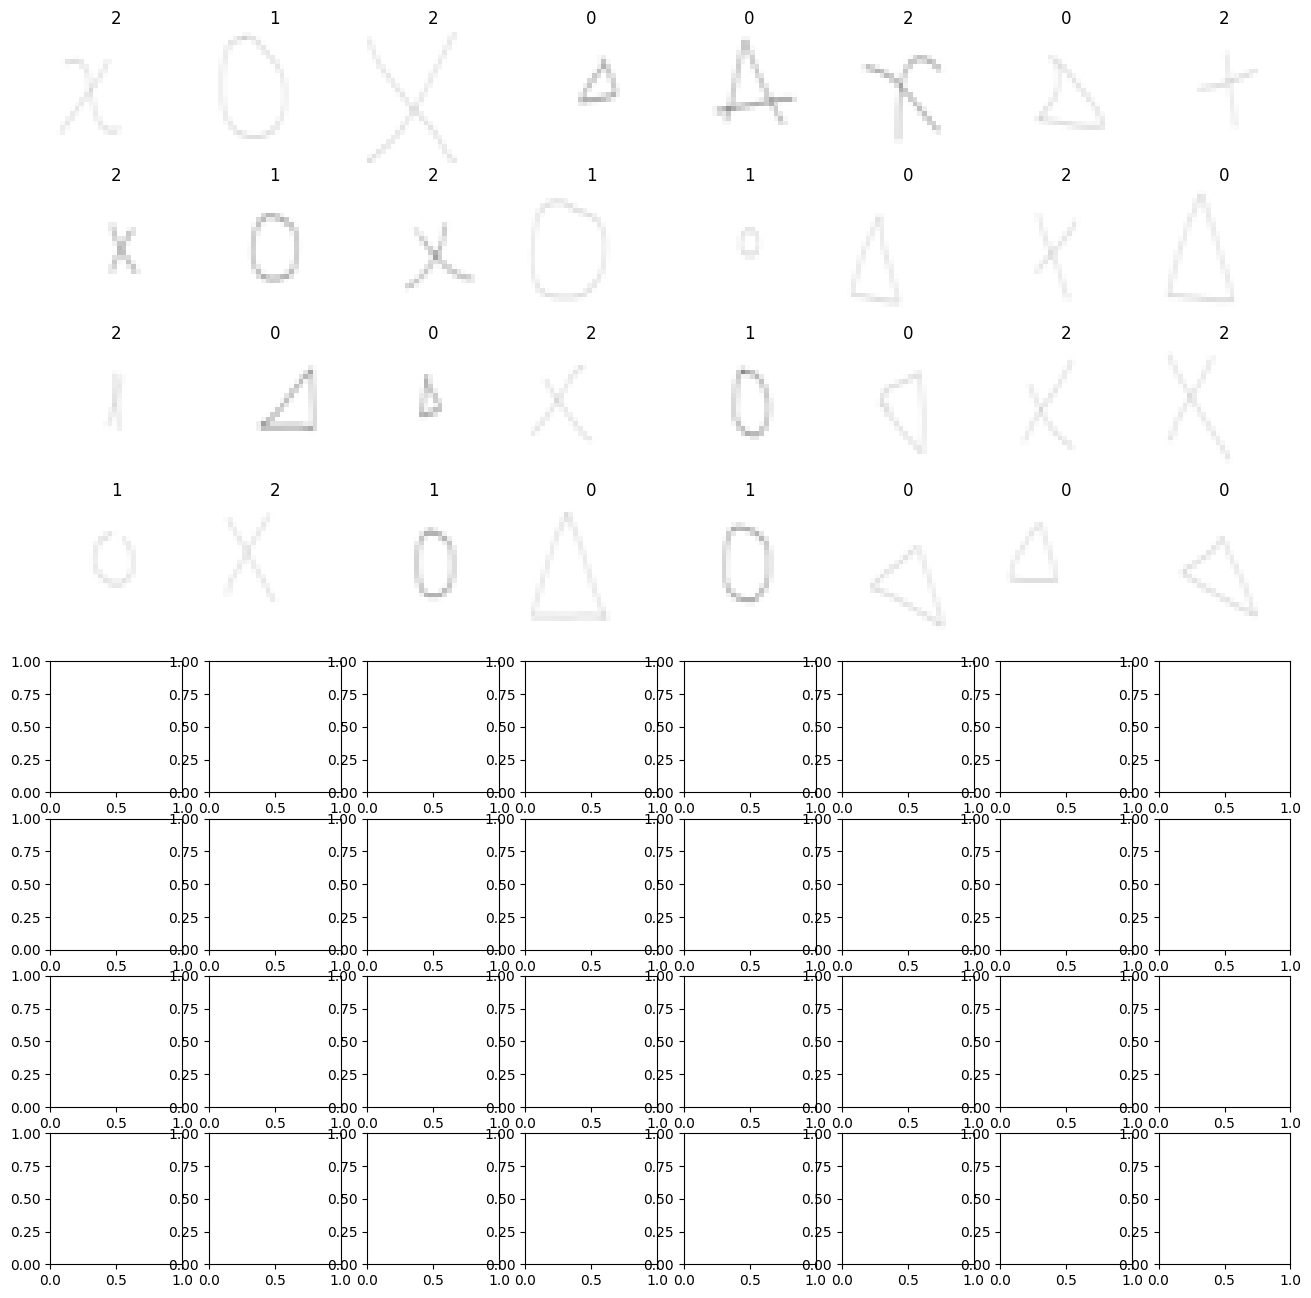

In [33]:
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

loader = DataLoader(
    dataset = train_data,
    batch_size=32,
    shuffle=True
)
imgs, labels = next(iter(loader))
fig, axes = plt.subplots(8,8,figsize=(16,16))

for ax, img, label in zip(axes.flatten(), imgs, labels):
  ax.imshow(img.permute(1, 2, 0))
  ax.set_title(label.item())
  ax.axis('off')

# plt.show()

In [34]:
model = nn.Sequential(
    nn.Conv2d(3, 32, kernel_size=3, padding='same'),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),

    nn.Conv2d(32, 64, kernel_size=3, padding='same'),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),

    nn.Flatten(),
    nn.Linear(64*7*7,10)
).to(device)

print(model)

Sequential(
  (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=3136, out_features=10, bias=True)
)


In [35]:
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 100
for epoch in range(epochs):
    sum_losses = 0
    sum_accs = 0
    for x_batch, y_batch in loader:
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        y_pred = model(x_batch)

        loss = nn.CrossEntropyLoss()(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        sum_losses = sum_losses + loss
        y_prob = nn.Softmax(1)(y_pred)
        y_pred_index = torch.argmax(y_prob, axis=1)
        acc = (y_batch == y_pred_index).float().sum() / len(y_batch) * 100
        sum_accs = sum_accs + acc

    avg_loss = sum_losses / len(loader)
    avg_acc = sum_accs / len(loader)
    print(f'Epoch {epoch:4d}/{epochs} Loss: {avg_loss:.6f} Accuracy: {avg_acc:.2f}%')

Epoch    0/100 Loss: 1.540640 Accuracy: 27.19%
Epoch    1/100 Loss: 1.149428 Accuracy: 27.50%
Epoch    2/100 Loss: 1.152921 Accuracy: 30.42%
Epoch    3/100 Loss: 1.177052 Accuracy: 29.38%
Epoch    4/100 Loss: 1.147703 Accuracy: 34.69%
Epoch    5/100 Loss: 1.110193 Accuracy: 32.40%
Epoch    6/100 Loss: 1.114645 Accuracy: 33.75%
Epoch    7/100 Loss: 1.110859 Accuracy: 31.46%
Epoch    8/100 Loss: 1.109110 Accuracy: 34.06%
Epoch    9/100 Loss: 1.101032 Accuracy: 34.17%
Epoch   10/100 Loss: 1.106094 Accuracy: 32.50%
Epoch   11/100 Loss: 1.097887 Accuracy: 33.12%
Epoch   12/100 Loss: 1.106331 Accuracy: 28.33%
Epoch   13/100 Loss: 1.101650 Accuracy: 36.04%
Epoch   14/100 Loss: 1.101494 Accuracy: 33.23%
Epoch   15/100 Loss: 1.096767 Accuracy: 31.98%
Epoch   16/100 Loss: 1.093737 Accuracy: 42.81%
Epoch   17/100 Loss: 1.096496 Accuracy: 35.21%
Epoch   18/100 Loss: 1.094249 Accuracy: 38.85%
Epoch   19/100 Loss: 1.088603 Accuracy: 35.31%
Epoch   20/100 Loss: 1.110578 Accuracy: 34.48%
Epoch   21/10

In [36]:
model.eval() # 모델을 테스트 모드로 전환

sum_accs = 0

for x_batch, y_batch in loader:
  x_batch = x_batch.to(device)
  y_batch = y_batch.to(device)
  y_pred = model(x_batch)
  y_prob = nn.Softmax(1)(y_pred)
  y_pred_index = torch.argmax(y_prob, axis=1)
  acc = (y_batch == y_pred_index).float().sum() / len(y_batch) * 100
  sum_accs = sum_accs + acc

avg_acc = sum_accs / len(loader)
print(f'테스트 정확도는 {avg_acc:.2f}% 입니다.')

테스트 정확도는 94.79% 입니다.
